In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import math

In [2]:
def show(img):
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def sho(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.array(img)
    plt.imshow(pixels)
    plt.show()

In [3]:
def HoughLines(img,thetaRes=1,rhoRes=1):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3) 

    thetas = np.deg2rad(np.arange(-90,90,thetaRes))
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    nthetas = len(thetas)
    
    h, w=edges.shape
    dia= math.sqrt(w*w+h*h)
    dia=round(dia)
    D=2*dia+1
    rhos = np.arange(-dia,dia,rhoRes)
    nrhos = len(rhos)
    
    acc=np.zeros(shape=(nrhos,nthetas))
    for i in range(h):
        for j in range(w):
            for k in range(nthetas):
                if(edges[i][j]>0):
                    a = cos_t[k]
                    b = sin_t[k]
                    rho = int((j+1)*a+(i+1)*b)+dia
#                     print(rho)
                    acc[rho][k]+=1
#     plt.imshow(lines, cmap="gray")
#     plt.show()
    return acc,thetas,rhos

In [4]:
def hough_peaks(H,n):
    flat = H.flatten()
    flat = np.argsort(flat)
    y = np.round(flat/H.shape[1])
    x = np.round(flat%H.shape[1])
    res = np.zeros(shape=(2,n))
    res[0] = x[-n:]
    res[1] = y[-n:]
    res = res.astype(int)
    return res

In [5]:
def drawLines(img,lines,theta,rho):
    img1 = img
    count=0
    for i in range(len(lines[0])):
        count+=1
        rhox = lines[1][i]
        thetax = lines[0][i]
        rhox = rho[rhox]
        thetax = theta[thetax]
        a = math.cos(thetax)
        b = math.sin(thetax)
        x0 = a * rhox
        y0 = b * rhox
        pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
        pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
        cv2.line(img1, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)
    return img1

In [6]:
img = cv2.imread("ps1.png")
H,theta,rho = HoughLines(img)

In [9]:
H

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
theta

array([-1.57079633, -1.55334303, -1.53588974, -1.51843645, -1.50098316,
       -1.48352986, -1.46607657, -1.44862328, -1.43116999, -1.41371669,
       -1.3962634 , -1.37881011, -1.36135682, -1.34390352, -1.32645023,
       -1.30899694, -1.29154365, -1.27409035, -1.25663706, -1.23918377,
       -1.22173048, -1.20427718, -1.18682389, -1.1693706 , -1.15191731,
       -1.13446401, -1.11701072, -1.09955743, -1.08210414, -1.06465084,
       -1.04719755, -1.02974426, -1.01229097, -0.99483767, -0.97738438,
       -0.95993109, -0.9424778 , -0.9250245 , -0.90757121, -0.89011792,
       -0.87266463, -0.85521133, -0.83775804, -0.82030475, -0.80285146,
       -0.78539816, -0.76794487, -0.75049158, -0.73303829, -0.71558499,
       -0.6981317 , -0.68067841, -0.66322512, -0.64577182, -0.62831853,
       -0.61086524, -0.59341195, -0.57595865, -0.55850536, -0.54105207,
       -0.52359878, -0.50614548, -0.48869219, -0.4712389 , -0.45378561,
       -0.43633231, -0.41887902, -0.40142573, -0.38397244, -0.36

In [11]:
rho

array([-362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352,
       -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341,
       -340, -339, -338, -337, -336, -335, -334, -333, -332, -331, -330,
       -329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319,
       -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308,
       -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297,
       -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286,
       -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275,
       -274, -273, -272, -271, -270, -269, -268, -267, -266, -265, -264,
       -263, -262, -261, -260, -259, -258, -257, -256, -255, -254, -253,
       -252, -251, -250, -249, -248, -247, -246, -245, -244, -243, -242,
       -241, -240, -239, -238, -237, -236, -235, -234, -233, -232, -231,
       -230, -229, -228, -227, -226, -225, -224, -223, -222, -221, -220,
       -219, -218, -217, -216, -215, -214, -213, -2

In [13]:
li = hough_peaks(H,6)

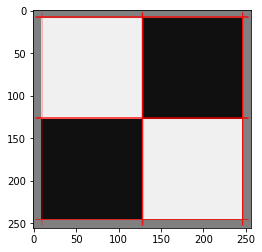

In [14]:
img1 = cv2.imread("ps1.png")
x = drawLines(img1,li,theta,rho)
sho(img1)

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
show(edges)

In [21]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
show(edges)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
show(cdst)